# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 9382 Павлов Роман и Поплавский Иван.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Передаточная функция полиномиального сглаживания:

$H(\omega) =\large  \frac{y_n}{s_n}$, где $y_n$ - сглаживающий полином.

Полиномиальное приближение заключается в минимизации квадратов разностей значений входного - $s_n$ - и выходного - $y_n$ - сигналов (МНК).

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Порядок выполнения работы

1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций для различного количества точек.
2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций для различного количества точек.
3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций для различного количества точек.
4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций для различного количества точек.
5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.
6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении пп. 1–4.
7. Сделать выводы.

## Выполнение работы

Определены функции для генерации векторов и матриц, и также функция для частичного решения СЛАУ.

In [1]:
from math import sin, cos, pi, log
import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter('ignore')

def k_sum(num, power):
    if num % 2 == 1:
        return np.array([k**power for k in range(0 - int(num/2), int(num/2) + 1)], dtype="int64")
    return np.array([], dtype="int64")

def generate_matrix(pnum, rows):
    matrix = [[0 for i in range(rows)] for j in range(rows)]
    for i in range(rows):
        for j in range(rows):
            matrix[i][j] = np.sum(k_sum(pnum, (i + j)*2))
    return matrix

def solve(pnum, rows):
    matrix_sum_s = generate_matrix(pnum, rows)
    for i in range(rows):
        matrix_sum_s[i][0] = k_sum(pnum, i*2)
    return matrix_sum_s

### Вывод формулы $\tilde{H}(f)$ для сглаживания прямой линией

$x_n = s(t)$ - входной сигнал
\
$y_n = A + Bt$ - выходной сигнал

Минимизируем функцию

$F(A, B) = \sum_{k = -m}^{m} (s_k - A - Bk)^2$

по методу наименьших квадратов.

Раскроем выражение под знаком суммы:

$s_k^2 + A^2 + B^2k^2 + 2ABk - 2As_k - 2Bks_k$

Взяв частные производные по $A$ и $B$ и приравняв их к 0, получим СЛАУ:

$\begin{equation}
    \begin{cases}
    A \sum_{k = -m}^{m} 1 + B \sum_{k = -m}^{m} k = \sum_{k = -m}^{m} s_k\\
    A \sum_{k = -m}^{m} k + B \sum_{k = -m}^{m} k^2 = \sum_{k = -m}^{m} k s_k
    \end{cases}
 \end{equation}
$

Суммы с нечётной степенью $k$ обратятся в 0 в силу противоположности своих элементов:

$\begin{equation}
    \begin{cases}
    A \sum_{k = -m}^{m} 1 = \sum_{k = -m}^{m} s_k\\
    B \sum_{k = -m}^{m} k^2 = \sum_{k = -m}^{m} k s_k
    \end{cases}
 \end{equation}
$

Тогда

$y_n = \large \frac{\sum_{k = -m}^{m} s_k}{\sum_{k = -m}^{m} 1}$

Для $3, 5, 7$ и $9$ точек знаменатели будут равны количеству точек, и $y_n$ будет иметь вид:

$\large \frac{1}{2m + 1} (s_{n-m} + s_{n-m + 1} + ... + s_{n + m-1} + s_{n+m})$

или

$\large \frac{1}{2m + 1} (e^{-mi\omega} + ... + 1 + ... + e^{mi\omega})e^{ni\omega}$

В таком случае передаточная функция будет выглядеть следующим образом:

$H(\omega) = \large \frac{1}{2m + 1} (1 + 2cos(\omega) + 2cos(2\omega) + ... + 2cos(m\omega))$

в общем случае и

$H(\omega) = \large \frac{1}{2m + 1} (1 + 2cos(\omega))$

для сглаживания прямой линией по трём точкам.

Для 5, 7 и 9 точек будет добавляться по одному множителю вида $\large 2cos(k\omega)$.

Изобразим графики передаточных функций при сглаживании прямой линией и выведем их графики для $f \in [0, 0.5]$:

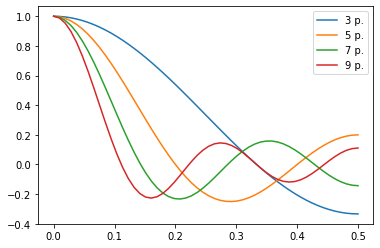

In [2]:
def H_tilde(coefs, f):
    pnum = coefs.size
    cos_sum = coefs[(pnum - 1)//2] + np.sum([2*coefs[(pnum - 1)//2-i-1]*cos(2*pi*(i+1)*f) for i in range(pnum//2)])
    return cos_sum/np.sum(coefs)

f = np.linspace(0, 0.5, 54)

solutions_1 = [[H_tilde(k_sum(3, 0), i) for i in f], [H_tilde(k_sum(5, 0), i) for i in f],
               [H_tilde(k_sum(7, 0), i) for i in f], [H_tilde(k_sum(9, 0), i) for i in f]]

for i in range(len(solutions_1)):
    plt.plot(f, np.array(solutions_1[i]), label = "{} p.".format(3 + i*2))
plt.legend()
plt.show()

На графике можно заметить увеличение частоты и уменьшение амплитуды колебаний передаточной функции с ростом количества точек.

### Вывод формулы $\tilde{H}(f)$ для сглаживания полиномом второй степени

$x_n = s(t)$ - входной сигнал
\
$y_n = A + Bt + Ct^2$ - выходной сигнал

Теперь минимизируем функцию

$F(A, B, C) = \sum_{k = -m}^{m} (s_k - A - Bk - Ck^2)^2$

Раскрывая суммируемое выражение, получим:

$s_k^2 + A^2 + B^2k^2 + C^2k^4 + 2ABk + 2ACk^2 + 2BCk^3 - 2As_k - 2Bks_k - 2Сk^2s_k$

СЛАУ, полученная при минимизации МНК, будет выглядеть следующим образом:

$\begin{equation}
    \begin{cases}
    A \sum_{k = -m}^{m} 1 + B \sum_{k = -m}^{m} k + C \sum_{k = -m}^{m} k^2 = \sum_{k = -m}^{m} s_k\\
    A \sum_{k = -m}^{m} k + B \sum_{k = -m}^{m} k^2 + C \sum_{k = -m}^{m} k^3 = \sum_{k = -m}^{m} k s_k\\
    A \sum_{k = -m}^{m} k^2 + B \sum_{k = -m}^{m} k^3 + C \sum_{k = -m}^{m} k^4 = \sum_{k = -m}^{m} k^2 s_k
    \end{cases}
 \end{equation}
$

Суммы, в которых переменная $k$ имеет нечётную степень, обнуляются, в итоге получена система

$\begin{equation}
    \begin{cases}
    (\sum_{k = -m}^{m} 1) A + 0B + (\sum_{k = -m}^{m} k^2) С = \sum_{k = -m}^{m} s_k\\
    0A + B \sum_{k = -m}^{m} k^2 + 0C = \sum_{k = -m}^{m} k s_k\\
    (\sum_{k = -m}^{m} k^2) A + 0B + (\sum_{k = -m}^{m} k^4) C = \sum_{k = -m}^{m} k^2 s_k
    \end{cases}
 \end{equation}
$

Уравнения (1, 3) и (2) линейно независимы, поэтому, чтобы найти $A$, достаточно решить систему из двух уравнений:

$\begin{equation}
    \begin{cases}
    (\sum_{k = -m}^{m} 1) A + (\sum_{k = -m}^{m} k^2) С = \sum_{k = -m}^{m} s_k\\
    (\sum_{k = -m}^{m} k^2) A + (\sum_{k = -m}^{m} k^4) C = \sum_{k = -m}^{m} k^2 s_k
    \end{cases}
 \end{equation}
$

Решить данную систему можно методом Крамера:

$
A = \large \frac
{(\sum_{k = -m}^{m} k^4)(\sum_{k = -m}^{m} s_k) - (\sum_{k = -m}^{m} k^2)(\sum_{k = -m}^{m} k^2 s_k)}
{(\sum_{k = -m}^{m} 1)(\sum_{k = -m}^{m} k^4) - (\sum_{k = -m}^{m} k^2)\sum_{k = -m}^{m} k^2)}
$

Суммы вида $\sum_{k = -m}^{m} k^p s_k$ можно представить скалярным произведением векторов, например:

$
\begin{bmatrix}
    -m^p \\
    (-m+1)^p \\
    \vdots \\
	m^p
\end{bmatrix}
*
\begin{bmatrix}
    s_{-m} \\
    s_{-m + 1} \\
    \vdots \\
	s_m
\end{bmatrix}
$

Тогда в числителе дроби будет вектор (сумма $s_k$, умноженных на коэффициенты), а в знаменателе - число.
Вынося множитель со знаменателем, получим передаточную функцию.
Для 5 точек это будет

$
H(\omega) = \large \frac{1}{35}(-3s_{-2} + 12 s_{-1} + 17s_0 + 12s_1 - 3s_2)
$

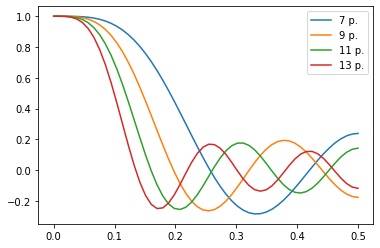

In [3]:
def solve_2(sol):
    det_sum_s = sol[0][0]*sol[1][1] - sol[0][1]*sol[1][0]
    return det_sum_s

solutions_2 = []

solution = solve(7, 2)
solution = solve_2(solution)
solutions_2.append([H_tilde(solution, i) for i in f])

solution = solve(9, 2)
solution = solve_2(solution)
solutions_2.append([H_tilde(solution, i) for i in f])

solution = solve(11, 2)
solution = solve_2(solution)
solutions_2.append([H_tilde(solution, i) for i in f])

solution = solve(13, 2)
solution = solve_2(solution)
solutions_2.append([H_tilde(solution, i) for i in f])

for i in range(len(solutions_2)):
    plt.plot(f, np.array(solutions_2[i]), label = "{} p.".format(7 + i*2))
plt.legend()
plt.show()

Исходя из данных, представленных на графике, можно сделать вывод, что полином большей степени дольше не уменьшает амплитуду с ростом частоты, но также увеличивает частоту колебаний передаточной функции. Зависимость амплитуды и частоты от количества точек схожа с зависимостью в предыдущем пункте.

### Вывод формулы $\tilde{H}(f)$ для сглаживания полиномом четвёртой степени

$x_n = s(t)$ - входной сигнал
\
$y_n = A + Bt + Ct^2 + Dt^3 + Et^4$ - выходной сигнал

Подобно тому, как это делалось в предыдущих пунктах, получена система

$
\begin{equation}
    \begin{cases}
    A \sum_{k = -m}^{m} 1 + B \sum_{k = -m}^{m} k + C \sum_{k = -m}^{m} k^2 + D \sum_{k = -m}^{m} k^3 + E \sum_{k = -m}^{m} k^4 = \sum_{k = -m}^{m} s_k\\
    A \sum_{k = -m}^{m} k + B \sum_{k = -m}^{m} k^2 + C \sum_{k = -m}^{m} k^3 + D \sum_{k = -m}^{m} k^4 + E \sum_{k = -m}^{m} k^5 = \sum_{k = -m}^{m} ks_k\\
    A \sum_{k = -m}^{m} k^2 + B \sum_{k = -m}^{m} k^3 + C \sum_{k = -m}^{m} k^4 + D \sum_{k = -m}^{m} k^5 + E \sum_{k = -m}^{m} k^6 = \sum_{k = -m}^{m} k^2 s_k\\
    A \sum_{k = -m}^{m} k^3 + B \sum_{k = -m}^{m} k^4 + C \sum_{k = -m}^{m} k^5 + D \sum_{k = -m}^{m} k^6 + E \sum_{k = -m}^{m} k^7 = \sum_{k = -m}^{m} k^3 s_k\\
    A \sum_{k = -m}^{m} k^4 + B \sum_{k = -m}^{m} k^5 + C \sum_{k = -m}^{m} k^6 + D \sum_{k = -m}^{m} k^7 + E \sum_{k = -m}^{m} k^7 = \sum_{k = -m}^{m} k^4 s_k
    \end{cases}
 \end{equation}
$,

которая сводится к системе

$
\begin{equation}
    \begin{cases}
    A \sum_{k = -m}^{m} 1 + C \sum_{k = -m}^{m} k^2 + E \sum_{k = -m}^{m} k^4 = \sum_{k = -m}^{m} s_k\\
    A \sum_{k = -m}^{m} k^2 + C \sum_{k = -m}^{m} k^4 + E \sum_{k = -m}^{m} k^6 = \sum_{k = -m}^{m} k^2 s_k\\
    A \sum_{k = -m}^{m} k^4 + C \sum_{k = -m}^{m} k^6 + E \sum_{k = -m}^{m} k^7 = \sum_{k = -m}^{m} k^4 s_k
    \end{cases}
 \end{equation}
$

Решив систему методом Крамера и найдя $A$, получим передаточную функцию.

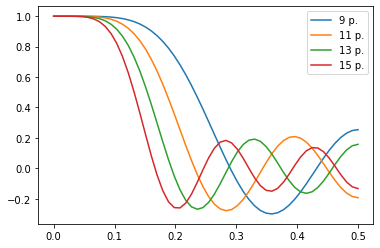

In [4]:
def solve_4(sol):
    det_sum_s = sol[0][0]*sol[1][1]*sol[2][2]
    det_sum_s += sol[1][0]*sol[2][1]*sol[0][2]
    det_sum_s += sol[0][1]*sol[1][2]*sol[2][0]
    det_sum_s -= sol[0][2]*sol[1][1]*sol[2][0]
    det_sum_s -= sol[0][1]*sol[1][0]*sol[2][2]
    det_sum_s -= sol[0][0]*sol[1][2]*sol[2][1]
    return det_sum_s

solutions_4 = []

solution = solve(9, 3)
solution = solve_4(solution)
solutions_4.append([H_tilde(solution, i) for i in f])

solution = solve(11, 3)
solution = solve_4(solution)
solutions_4.append([H_tilde(solution, i) for i in f])

solution = solve(13, 3)
solution = solve_4(solution)
solutions_4.append([H_tilde(solution, i) for i in f])

solution = solve(15, 3)
solution = solve_4(solution)
solutions_4.append([H_tilde(solution, i) for i in f])

for i in range(len(solutions_4)):
    plt.plot(f, np.array(solutions_4[i]), label = "{} p.".format(9 + i*2))
plt.legend()
plt.show()

По сравнению с полиномом второй степени, полином четвёртой степени ещё дольше сглаживает низкие частоты с ростом частоты, однако увеличивает частоту колебаний передаточной функции. Влияние количества точек такое же, как и в предыдущих двух пунктах.

### Вывод формулы $\tilde{H}(f)$ для сглаживания формулами Спенсера



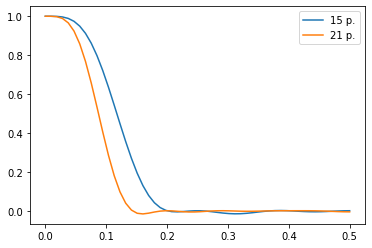

In [5]:
coefs_15 = [-3, -6, -5, 3, 21, 46, 67]
coefs_15 = coefs_15 + [74] + list(reversed(coefs_15))

coefs_21 = [-1, -3, -5, -5, -2, 6, 18, 33, 47, 57]
coefs_21 = coefs_21 + [60] + list(reversed(coefs_21))

spens_solutions = [[H_tilde(np.array(coefs_15), i) for i in f], [H_tilde(np.array(coefs_21), i) for i in f]]

plt.plot(f, np.array(spens_solutions[0]), label = "15 p.")
plt.plot(f, np.array(spens_solutions[1]), label = "21 p.")
plt.legend()
plt.show()

Из графика выше видно, что формулы Спенсера быстро уменьшают амплитуду колебаний. С ростом числа точек частота колебаний передаточной функции становится не больше, а меньше, также уменьшается её амплитуда.


## Вывод графиков передаточных функций в логарифмической шкале

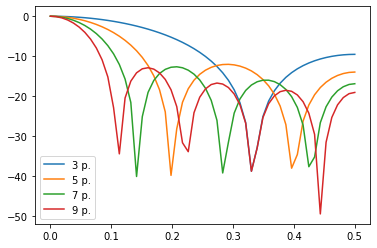

In [6]:
for i in range(len(solutions_1)):
    plt.plot(f, 20*np.log10(np.abs(solutions_1[i])), label = "{} p.".format(3 + i*2))

plt.legend()
plt.show()

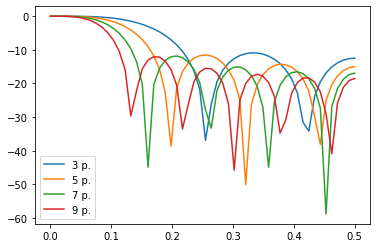

In [10]:
for i in range(len(solutions_2)):
    plt.plot(f, 20*np.log10(np.abs(solutions_2[i])), label = "{} p.".format(3 + i*2))

plt.legend()
plt.show()

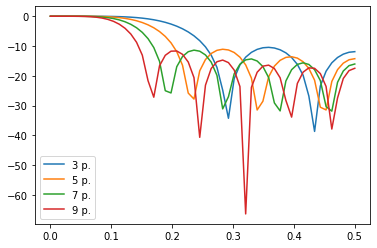

In [8]:
for i in range(len(solutions_4)):
    plt.plot(f, 20*np.log10(np.abs(solutions_4[i])), label = "{} p.".format(3 + i*2))

plt.legend()
plt.show()

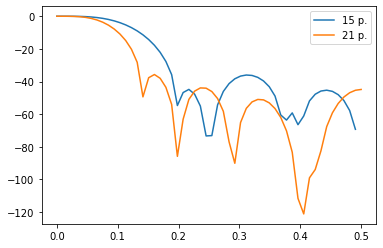

In [9]:
plt.plot(f, 20*np.log10(np.abs(spens_solutions[0])), label = "15 p.")
plt.plot(f, 20*np.log10(np.abs(spens_solutions[1])), label = "21 p.")

plt.legend()
plt.show()

Графики в логарифмической шкале отражают, какие частоты подавляются сильнее. Чем меньше значение передаточной функции в Дб, тем сильнее приглушается сигнал. Уменьшение на $20k$ Дб приводит к подавлению исходного сигнала в $10^k$ раз.

## Сопоставительный анализ свойств передаточных функций

При сравнении фильтров наблюдалось, что увеличение степени сглаживающего полинома приводит к увеличению размера окна низких частот, для которых приглушение входного сигнала является слабым.
Также увеличение количества используемых точек приводит к тому, что производная переходной функции имеет большее по абсолютной величине значение.  
Помимо этого, при использовании фильтра, соответствующего сглаживанию по формулам Спенсера, амплитуда уменьшается заметно быстрее, чем при использовании других фильтров.

## Выводы

В ходе выполнения лабораторной работы проанализированы частотные характеристики известных формул полиномиального сглаживания временных рядов и построены их графики.